![](IMG_9723.PNG)

In [73]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import imdb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import plotly.express as px

from sklearn.datasets import load_boston

#Import Useful Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Dash
import dash_bootstrap_components as dbc
import plotly.express as px
import plotly.graph_objects as go

from sklearn.datasets import load_iris, load_wine

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [74]:
df=pd.read_csv('Final_Dataset.txt', sep='\t')

In [75]:
df

,Unnamed: 0,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,5/27/2017,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,5/21/2017,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,8/10/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,7/26/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,7/7/2017,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1247848,4/22/2017,23716,Extraterrestrial,4865,MOVIE,0,0,Horror MovieExtraterrestrial (HD),Horror,0,0,Extraterrestrial
1048571,1247849,11/29/2017,1776,Friends The One With The Holiday Armadillo,1261,SERIES/EPISODES,7,10,Comedy MovieThe One With The Holiday Armadillo...,Comedy,0,0,Friends
1048572,1247850,6/15/2017,1918,Masters of Horror Dreams In The Witch House,6,SERIES/EPISODES,1,2,Horror MovieDreams In The Witch House,Horror,0,0,Masters of Horror
1048573,1247851,9/11/2017,25737,Two Lovers and a Bear,72,MOVIE,0,0,Drama MovieTwo Lovers and a Bear (HD),Drama,0,1,Two Lovers and a Bear


## Split the date column into day, month, year 

In [76]:
df[["month", "day", "year"]] = df["date_"].str.split("/", expand = True)
df.head()

,Unnamed: 0,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name,month,day,year
0,1,5/27/2017,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets,5,27,2017
1,3,5/21/2017,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana,5,21,2017
2,4,8/10/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess,8,10,2017
3,5,7/26/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess,7,26,2017
4,7,7/7/2017,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill,7,7,2017


In [ ]:
newdf.to_csv('movie_dataset_ml')

In [77]:
# drop index colum
df = df.drop(['Unnamed: 0'], axis = 1) 

### Elinimnate whitespace in column name

To make sure the column names in our dataset, we will not have the trailing whitespace problem.

In [78]:
#  The map function is applied to Series objects, whereas the apply and applymap functions are called on Dataframes.
df.columns = df.columns.map(str.strip)
df.columns

Index(['date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name', 'month', 'day', 'year'],
      dtype='object')

In [79]:
#Replace zeros with Nan
#except HD because it's boolean
df = df.replace({'0':np.nan, 0:np.nan})
df['hd'] = df['hd'].replace(np.nan,0)
df[["hd","duration_seconds","user_id_maped"]] = df[["hd" , "duration_seconds","user_id_maped"]].astype(int, copy=False, errors='raise')
#df= df['hd'].astype(int, copy=False, errors='raise')
df.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name,month,day,year
0,5/27/2017,26138,100 treets,40,MOVIE,NaN,NaN,Drama Movie100 Streets,Drama,NaN,0,100 treets,5,27,2017
1,5/21/2017,7946,Moana,17,MOVIE,NaN,NaN,Animation MovieMoana (HD),Animation,NaN,1,Moana,5,21,2017
2,8/10/2017,7418,The Mermaid Princess,8,MOVIE,NaN,NaN,Animation MovieThe Mermaid Princess (HD),Animation,NaN,1,The Mermaid Princess,8,10,2017
3,7/26/2017,19307,The Mermaid Princess,76,MOVIE,NaN,NaN,Animation MovieThe Mermaid Princess (HD),Animation,NaN,1,The Mermaid Princess,7,26,2017
4,7/7/2017,15860,Churchill,87,MOVIE,NaN,NaN,Biography MovieChurchill (HD),Biography,NaN,1,Churchill,7,7,2017


In [80]:
# Take a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   date_             1048575 non-null  object 
 1   user_id_maped     1048575 non-null  int32  
 2   program_name      1048575 non-null  object 
 3   duration_seconds  1048575 non-null  int32  
 4   program_class     1048575 non-null  object 
 5   season            560098 non-null   float64
 6   episode           547480 non-null   float64
 7   program_desc      1034537 non-null  object 
 8   program_genre     1048575 non-null  object 
 9   series_title      12645 non-null    float64
 10  hd                1048575 non-null  int32  
 11  original_name     1048575 non-null  object 
 12  month             1048575 non-null  object 
 13  day               1048575 non-null  object 
 14  year              1048575 non-null  object 
dtypes: float64(3), int32(3), object(9)
memory usage: 

                  missing_values   percent_missing %
date_                           0           0.000000
user_id_maped                   0           0.000000
program_name                    0           0.000000
duration_seconds                0           0.000000
program_class                   0           0.000000
season                     488477          46.584841
episode                    501095          47.788189
program_desc                14038           1.338769
program_genre                   0           0.000000
series_title              1035930          98.794078
hd                              0           0.000000
original_name                   0           0.000000
month                           0           0.000000
day                             0           0.000000
year                            0           0.000000


Text(0.5, 0, 'Missing Values')

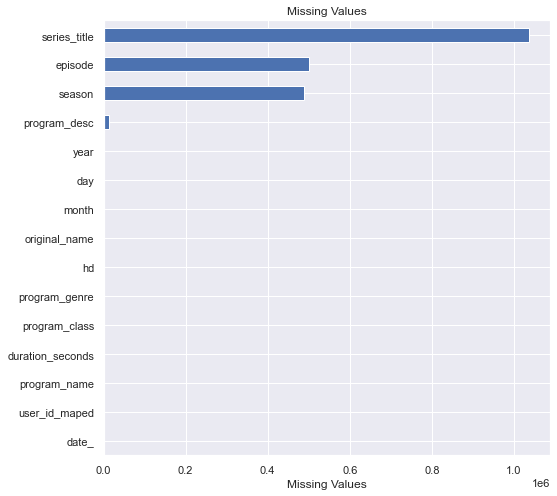

In [81]:
# number of missing values in the dataset
missing_values = df.isnull().sum() 

# missing value percent %
percent_missing = missing_values / df.shape[0]*100 

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}

#Constructing DataFrame from a dictionary 
frame = pd.DataFrame(value) 
print(frame)

df.isnull().sum().sort_values().plot(kind="barh", title="Missing Values");
plt.xlabel('Missing Values')

Our data have missing values in colums season, episode, program_desc and series_title

In [82]:
# Basic rule if column has over 70%  value will be eliminated:
df.dropna(axis=1, thresh = int(0.7*df.shape[0]), inplace=True)

## Change the order of Dataset columns

In [69]:
# Assign the column names in the order you want 

df = df[[ 'year','month','day','user_id_maped',
          'program_name','duration_seconds','program_class',
          'program_desc','program_genre','hd','original_name']]
df.head()

,year,month,day,user_id_maped,program_name,duration_seconds,program_class,program_desc,program_genre,hd,original_name
0,2017,5,27,26138,100 treets,40,MOVIE,Drama Movie100 Streets,Drama,0,100 treets
1,2017,5,21,7946,Moana,17,MOVIE,Animation MovieMoana (HD),Animation,1,Moana
2,2017,8,10,7418,The Mermaid Princess,8,MOVIE,Animation MovieThe Mermaid Princess (HD),Animation,1,The Mermaid Princess
3,2017,7,26,19307,The Mermaid Princess,76,MOVIE,Animation MovieThe Mermaid Princess (HD),Animation,1,The Mermaid Princess
4,2017,7,7,15860,Churchill,87,MOVIE,Biography MovieChurchill (HD),Biography,1,Churchill


# Fetch rate, seasons, and episods number and missing values from IMDb 
### Source of supportive datasets: https://datasets.imdbws.com/

In [84]:
data = pd.read_csv('data.tsv', sep="\t")

c:\users\fatoo\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [85]:
data

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
30780660,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
30780661,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
30780662,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
30780663,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [86]:
data1 = pd.read_csv('data1.tsv',sep='\t')

In [87]:
data1

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tt15180956,1,2
1,tt0020829,tt15180956,1,1
2,tt0021166,tt15180956,1,3
3,tt0021612,tt15180956,2,2
4,tt0021655,tt15180956,2,5
...,...,...,...,...
6438320,tt9916846,tt1289683,3,18
6438321,tt9916848,tt1289683,3,17
6438322,tt9916850,tt1289683,3,19
6438323,tt9916852,tt1289683,3,20


In [88]:
data2 = pd.read_csv('data2.tsv',sep='\t')

In [89]:
data2

,tconst,averageRating,numVotes
0,tt0000001,5.7,1849
1,tt0000002,6.0,241
2,tt0000003,6.5,1616
3,tt0000004,6.0,156
4,tt0000005,6.2,2442
...,...,...,...
1206952,tt9916682,5.6,5
1206953,tt9916690,6.6,5
1206954,tt9916720,5.4,176
1206955,tt9916766,6.7,18


In [90]:
# Merge them 
data.rename(columns = {'titleId':'tconst'}, inplace = True)
df1 = pd.merge(data1, data2)
df2 = pd.merge(df1, data)

In [91]:
# Finally merge with Jawwi Data 
df.rename(columns = {'original_name':'title'}, inplace = True)
df2.rename(columns = {'primaryTitle':'title'}, inplace = True)
newdf = pd.merge(df,df2)
newdf.shape

(355696, 24)

In [92]:
#drop duplicate columns  or not useful columns
newdf.drop(["parentTconst","program_desc","types","attributes","language","parentTconst",'region'],  axis = 1, inplace = True)

In [93]:
#newdf.to_csv('movie_dataset_ml')
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355696 entries, 0 to 355695
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date_             355696 non-null  object 
 1   user_id_maped     355696 non-null  int32  
 2   program_name      355696 non-null  object 
 3   duration_seconds  355696 non-null  int32  
 4   program_class     355696 non-null  object 
 5   program_genre     355696 non-null  object 
 6   hd                355696 non-null  int32  
 7   title             355696 non-null  object 
 8   month             355696 non-null  object 
 9   day               355696 non-null  object 
 10  year              355696 non-null  object 
 11  tconst            355696 non-null  object 
 12  seasonNumber      355696 non-null  object 
 13  episodeNumber     355696 non-null  object 
 14  averageRating     355696 non-null  float64
 15  numVotes          355696 non-null  int64  
 16  ordering          35

In [94]:
#Now we have clean data
newdf.isnull().sum()

date_               0
user_id_maped       0
program_name        0
duration_seconds    0
program_class       0
program_genre       0
hd                  0
title               0
month               0
day                 0
year                0
tconst              0
seasonNumber        0
episodeNumber       0
averageRating       0
numVotes            0
ordering            0
isOriginalTitle     0
dtype: int64

# Let's start EDA!

In [95]:
#highest number of viewers by year
movies_by_year = newdf['year'].value_counts().sort_index(ascending=True)
movies_by_year

2017    269861
2018     85835
Name: year, dtype: int64

In [96]:
newdf[newdf['year'] == '2018'][['title', 'averageRating']].max()

title            You're Next
averageRating            9.5
dtype: object

In [97]:
newdf[newdf['year'] == '2017'][['title', 'averageRating']].max()

title            Zodiac
averageRating       9.9
dtype: object

In [98]:
# the top 10 by rate
rate_df = newdf.sort_values('averageRating', ascending=False)
rate_df[['title','program_genre','averageRating']].drop_duplicates().head(10)

,title,program_genre,averageRating
348083,The Door,Drama,9.9
355208,Face Off,Action,9.9
353232,Can't Buy Me Love,Comedy,9.8
348090,The Door,Drama,9.7
233594,The Box,Horror,9.6
186202,The Intervention,Comedy,9.5
324826,The Departed,Thriller,9.5
347091,The Godfather,Drama,9.5
288126,Meet the Parents,Comedy,9.5
346336,Unthinkable,Thriller,9.5


In [99]:
# last 10 rated on the list 
rate_df = newdf.sort_values('averageRating', ascending=True)
rate_df[['title','program_genre','averageRating']].drop_duplicates().head(10)

,title,program_genre,averageRating
240794,Cinderella,Drama,1.3
241585,Cinderella,Animation,1.3
267989,Finders Keepers,Thriller,2.7
349108,Notorious,Biography,3.0
328571,The Accused,Drama,3.2
285537,Genius,Biography,3.6
322730,In the Dog House,Family,3.7
352446,The Heat,Comedy,4.0
286103,Pocahontas,Animation,4.2
151812,Aftermath,Drama,4.7


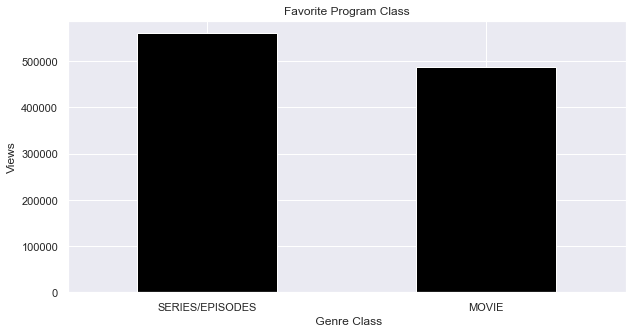

In [100]:
df['program_class'].value_counts().plot(kind='bar', 
                                title='program class', 
                                figsize=(10,5), color='black')
plt.xticks(rotation=0)
plt.xlabel(" Genre Class")
plt.ylabel("Views")
plt.title('Favorite Program Class')
plt.show()

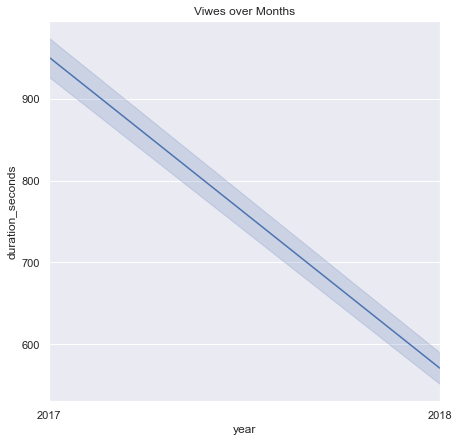

In [131]:
l= sns.lineplot(x='year', y='duration_seconds', data= newdf)
plt.title('Viwes over Months')
sns.set(rc={'figure.figsize':(7,7)})
plt.xlim('2017','2018')
plt.show()

In [135]:
newdf

,date_,user_id_maped,program_name,duration_seconds,program_class,program_genre,hd,title,month,day,year,tconst,seasonNumber,episodeNumber,averageRating,numVotes,ordering,isOriginalTitle
0,1/27/2018,11660,Kidnap,85,MOVIE,Action,1,Kidnap,1,27,2018,tt0534484,3,18,6.9,62,1,1
1,1/27/2018,11660,Kidnap,85,MOVIE,Action,1,Kidnap,1,27,2018,tt0534484,3,18,6.9,62,2,0
2,1/27/2018,11660,Kidnap,85,MOVIE,Action,1,Kidnap,1,27,2018,tt0649245,7,11,8.0,93,1,0
3,1/27/2018,11660,Kidnap,85,MOVIE,Action,1,Kidnap,1,27,2018,tt0673627,2,8,7.6,65,1,0
4,1/27/2018,11660,Kidnap,85,MOVIE,Action,1,Kidnap,1,27,2018,tt0684236,2,4,5.8,34,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355691,4/20/2018,32570,Dreamcatcher,79,MOVIE,Drama,0,Dreamcatcher,4,20,2018,tt3549296,2,15,8.7,755,1,0
355692,4/20/2018,32570,Dreamcatcher,79,MOVIE,Drama,0,Dreamcatcher,4,20,2018,tt4799922,5,5,8.3,1182,1,0
355693,4/16/2018,22557,Dreamcatcher,16,MOVIE,Drama,0,Dreamcatcher,4,16,2018,tt11131848,3,11,8.8,14,1,0
355694,4/16/2018,22557,Dreamcatcher,16,MOVIE,Drama,0,Dreamcatcher,4,16,2018,tt3549296,2,15,8.7,755,1,0


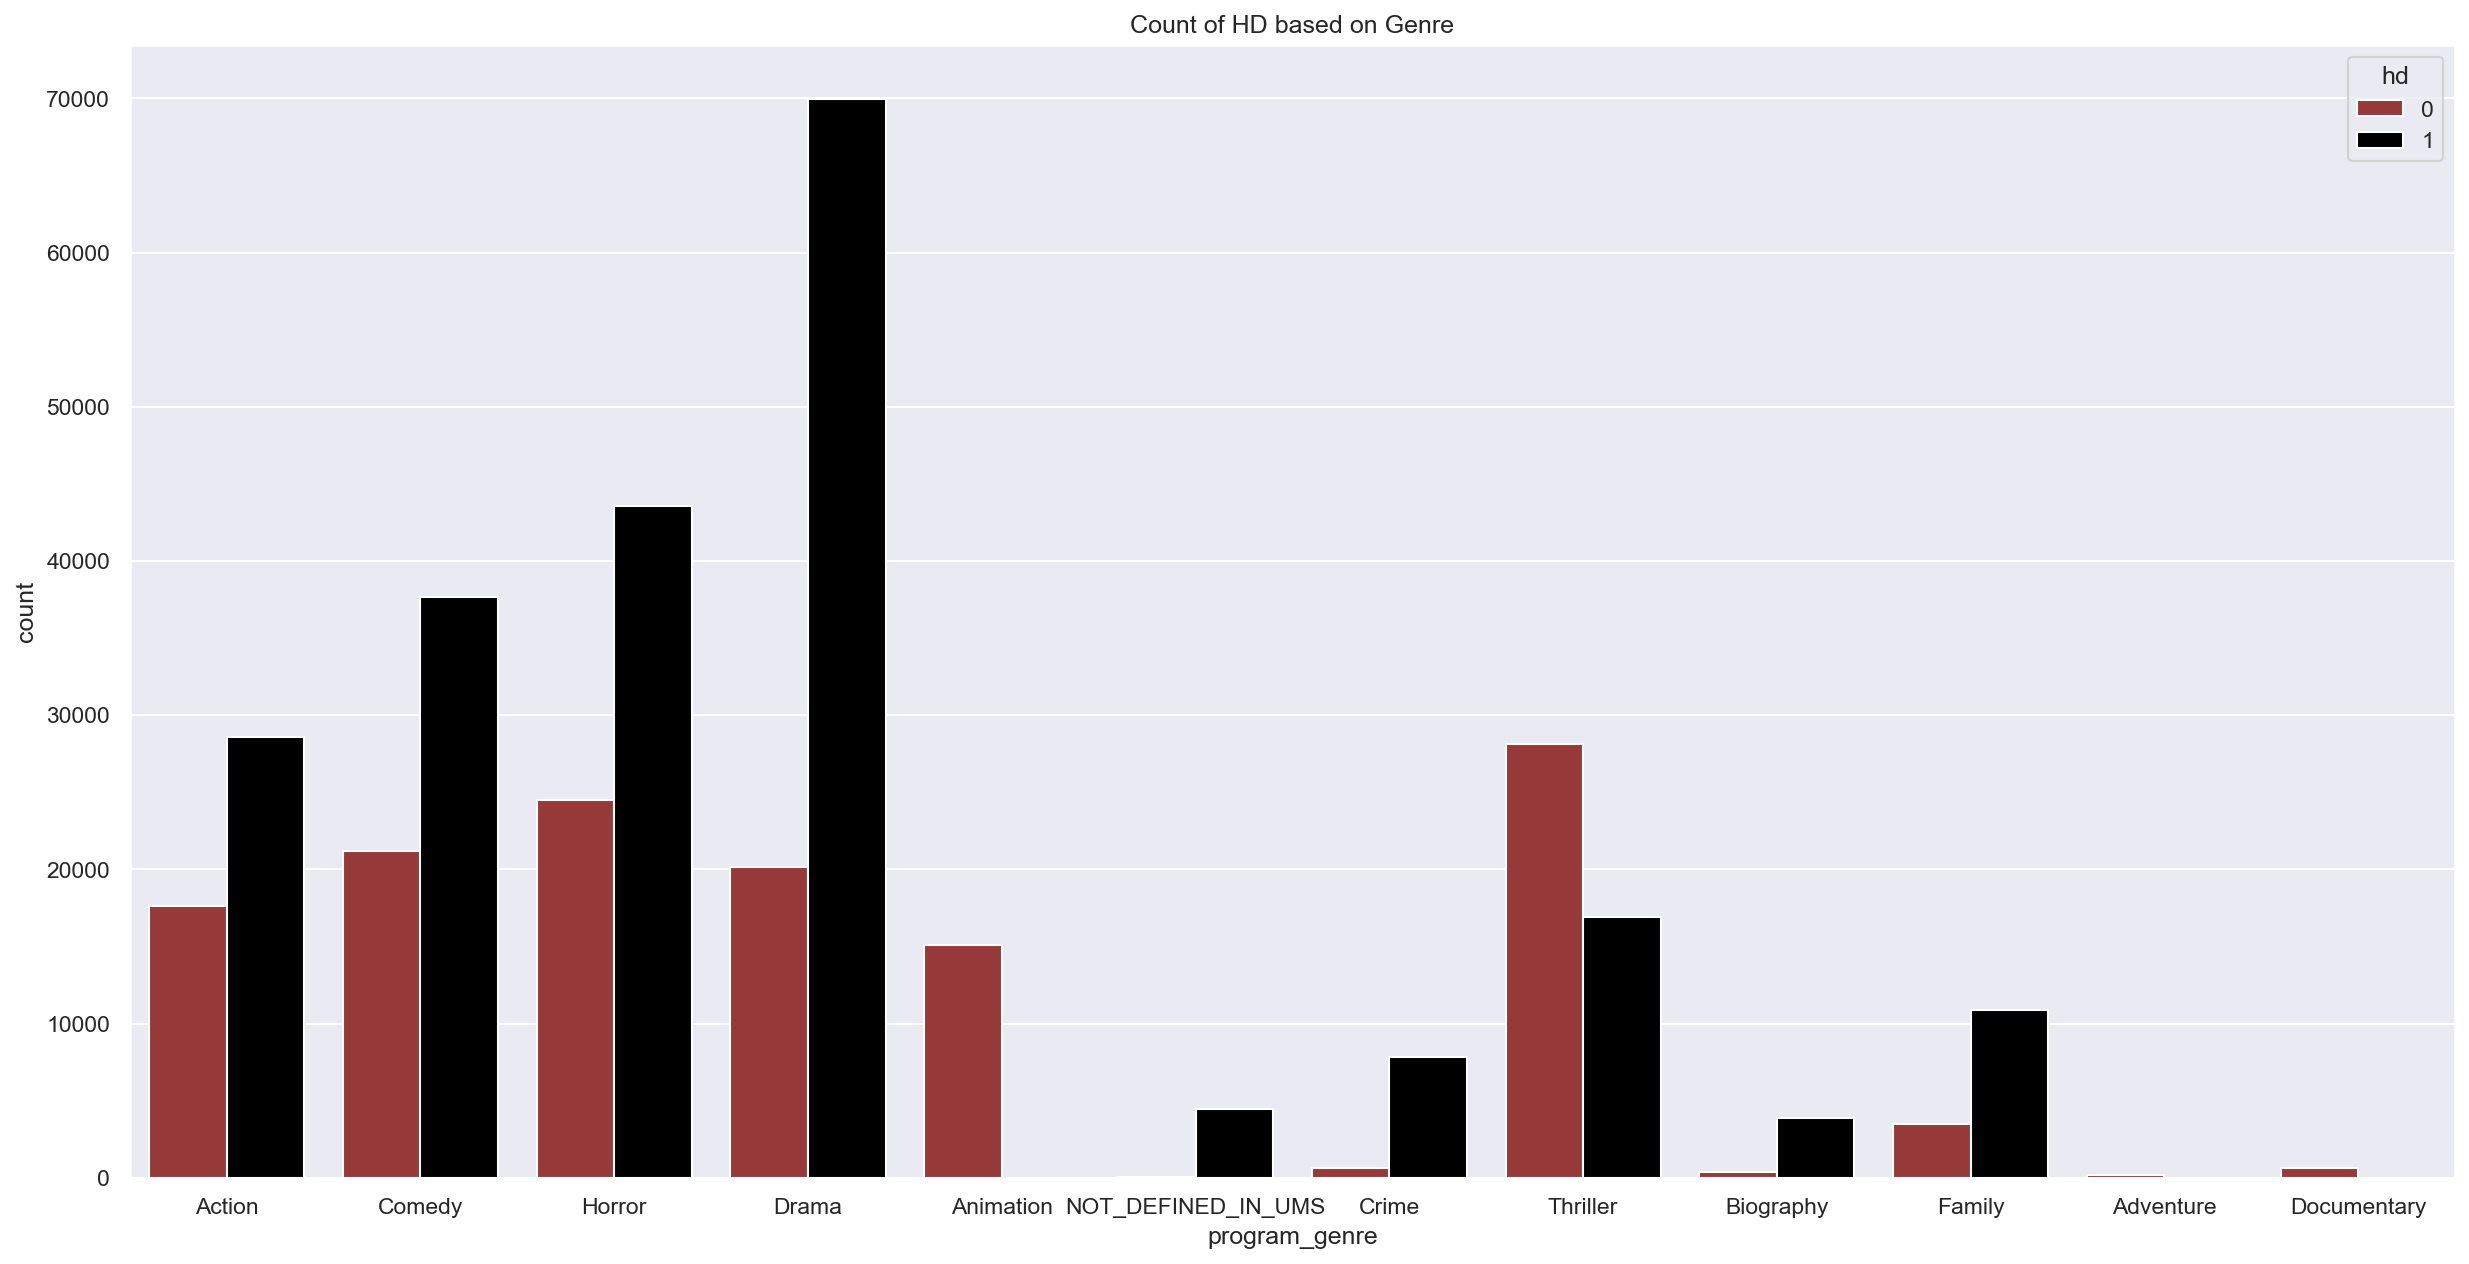

In [136]:
# Type of display on Jawwi App.
plt.figure(figsize=(20,10), dpi= 150)
sns.set_style("darkgrid")
ax = sns.countplot(x=newdf['program_genre'], 
                   data = newdf, 
                   hue='hd',
                   palette= ['brown', 'black'])

plt.title('Count of HD based on Genre')
plt.show()
#Most shows and movies are displayed with HD

In [137]:
#want to see the most program_genre 
datanew=newdf
program_g = newdf['program_genre'].value_counts().reset_index()

#change column name index to program_genre and program_genre to Count
program_g.rename(columns={"index":'program_genre','program_genre':'Count'},inplace=True)
program_g

,program_genre,Count
0,Drama,90117
1,Horror,68043
2,Comedy,58804
3,Action,46236
4,Thriller,45029
5,Animation,15067
6,Family,14379
7,Crime,8443
8,NOT_DEFINED_IN_UMS,4535
9,Biography,4243


In [ ]:
external_stylesheets = ["https://codepen.io/somewhat-random-code/pen/QWdrZGQ.css", dbc.themes.CYBORG] 
app = dash.Dash(__name__, external_stylesheets=external_stylesheets) 

app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H2', children = 'Jawwy TV ', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
html.Div([
                        html.Div([
                            html.Div([
                                html.Div([
                                    html.H3(id='movies_18')
                                ],className='box_emissions'),

                                html.Div([
                                    html.H3(id='movies_17')
                                ],className='box_emissions'),
                            
                            ], style={'display': 'flex'}), ], className='box', style={'heigth':'10%'}),
  #-------------------------------------------------  
    html.Br(),
    html.H5(" Rating and Number of Votes ",style={'textAlign': 'center'}),
    dcc.Tabs([
        dcc.Tab(label='Average Rating by program genre', children=[
            dcc.Graph(
                figure={
                    'data': [
                        #{'x':datanew["program_genre"], 'y':datanew["Votesgroup"],
                           # 'type': 'bar', 'name': 'Votesgroup'},
                        {'x':datanew["program_genre"].value_counts().index, 'y':datanew["averageRating"].value_counts(),
                         'type': 'bar', 'name': 'table'},
                    ]
                }
            )
        ]),
                dcc.Tab(label='Number of Votes by Month', children=[
            dcc.Graph(
                figure={
                    'data': [
                        {'x':datanew["month"].unique(), 'y':datanew["numVotes"],
                            'type': 'bar', 'name': 'carat'},
                        
                        #{'x':datanew["program_class"], 'y':datanew["groupRating"],#.value_counts().values,
                         #'type': 'bar', 'name': 'class'},
                    ]}
            )
        ]),
#----
    ]),
    html.Br(),
    html.Br(),
                       #Title
                       html.H4(" Popular Genres of programs for Jawwy Subscribers",style={'textAlign': 'center'}),
    html.Label([
                                   "Please Choose 10 or 5 Popular Programs Genres:",
                                    dcc.Dropdown(
                                        id='ProgramGenre', 
                                        clearable=False,
                                        # by default I am not making any selection 
                                        # value = -1 --> selects both
                                        value= -1, 
                                        options=[{'label': "5  Program Genre", 'value': 1},                                                
                                                 {'label': "10 Program Genre", 'value': -1}]  ),
                       # Area to hold Graph --> This is a space holder 
                       dcc.Graph(id="graph")
                       
   ]),
    html.Br(),
    html.Br(),])])

@app.callback(
    Output('graph', 'figure'),
    [Input("ProgramGenre", "value")]
)
# Note: order in the callbacks is important
def update_figure(val_att):
    data = program_g[:10]
    if(val_att == 1):
        test = program_g[:5]
        fig  = px.scatter(test,
                   x="Count", 
                   y="program_genre",
                   template ="plotly_dark",# without the horizontal line
                   color="program_genre",
                   symbol="program_genre",
                   opacity = .8)
        
        fig.update_traces(marker=dict(size=26, line=dict(width=1.5,color='DarkSlateGrey')), selector=dict(mode='markers'))
        fig.update_layout(title_text="<b> 'Popular 5 programs Genres' </b>",title_x=0.5,font_size=18)
        return fig
    
    else:
        fig = px.scatter(data,
                        x="Count", 
                        y="program_genre",
                        template ="plotly_dark",# without the horizontal line
                        color="program_genre",
                        symbol="program_genre",
                        width=1900, 
                        height=700, opacity = .8)        
        fig.update_traces(marker=dict(size=18, line=dict(width=1.5,color='DarkSlateGrey')), selector=dict(mode='markers'))
        fig.update_layout(title_text="<b> 'Popular 10 programs Genres' </b>",title_x=0.5,font_size=18)
        
        return fig

if __name__ == '__main__':
    app.run_server(debug=False,port=121)
#app.run_server(debug=True)
#app.run_server( debug=False,port=3)

Dash is running on http://127.0.0.1:121/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:121/ (Press CTRL+C to quit)
127.0.0.1 - - [02/Feb/2022 01:15:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Feb/2022 01:15:57] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [02/Feb/2022 01:15:57] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [02/Feb/2022 01:15:57] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Feb/2022 01:15:57] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Feb/2022 01:15:57] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Feb/2022 01:15:57] "POST /_dash-update-component HTTP/1.1" 200 -
